 # Actividad 7

Alumno: Milton Aldair Martínez Acosta  

Matrícula: 1870354

Estadística Aplicada

Grupo: 051

In [133]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

In [134]:
#fijar el tamaño de las graficas
plt.rcParams['figure.figsize'] = [10, 7.5]

## 1.- Toma los últimos dos dígitos de tu matrícula (Xx) y ordena de mayor a menor, simula un MA(2) donde  $ \theta_1=X$ y $ \theta_2=x$

Vamos a simular un proceso de medias móviles de segundo orden MA(2) con $ \theta_1=0.5$ y $ \theta_2=0.4$

$Y_t = \varepsilon_t + 0.5 \varepsilon_{t-1} + 0.4 \varepsilon_{t-2}$

In [135]:
#en python tenemos que modelarlo como un proceso arma sin la parte AR(p)
np.random.seed(13)
ma1 = np.array([1, 0.5, 0.4])
ar1 = np.array([1])
pMA2 = ArmaProcess(ar1, ma1).generate_sample(1000)

### Gráfica

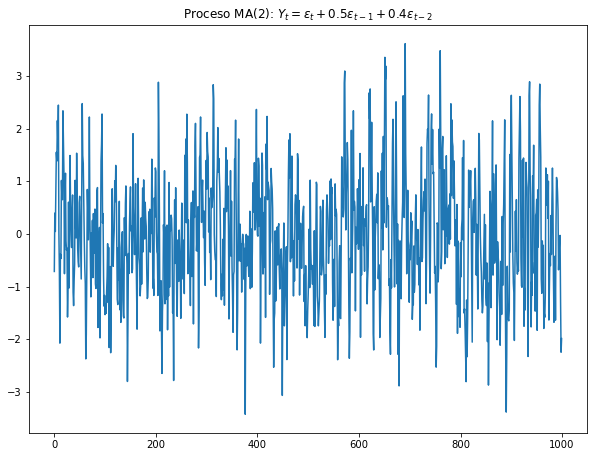

In [136]:
#graficamos
plt.plot(pMA2)
plt.title(r'Proceso MA(2): $Y_t = \varepsilon_t + 0.5 \varepsilon_{t-1} + 0.4 \varepsilon_{t-2}$')
plt.show()

### Prueba de raíz unitaria

In [137]:
#hacemos la prueba de dickey fuller aumentada ADF
adf1 = adfuller(pMA2)

#presentamos el p-value
print('p-value: %f' % adf1[1])



p-value: 0.000000


In [138]:
if adf1[1] < 0.05:
    
    print(f'con un un p-value={adf1[1]}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf1[1]}\n NO se rechaza hipótesis nula, serie no estacionaria') 


con un un p-value=1.5721039301279526e-25
 Se rechaza hipótesis nula, serie estacionaria


### Gráfica de autocorrelación

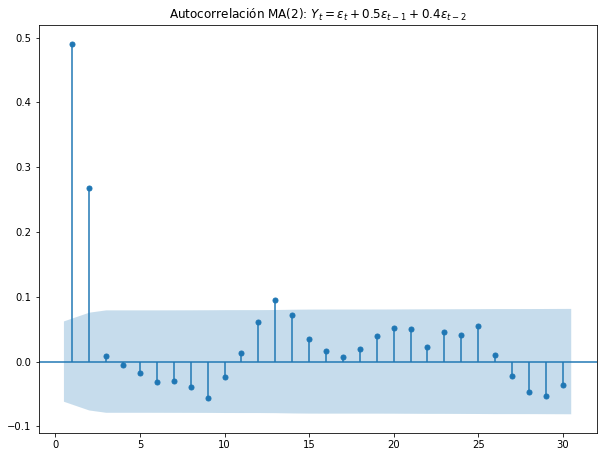

In [139]:
#graficamos función de autocorrelación
plot_acf(pMA2, zero=False, lags=30)
plt.title(r'Autocorrelación MA(2): $Y_t = \varepsilon_t + 0.5 \varepsilon_{t-1} + 0.4 \varepsilon_{t-2}$')
plt.show()

### Gráfica de autocorrelación parcial

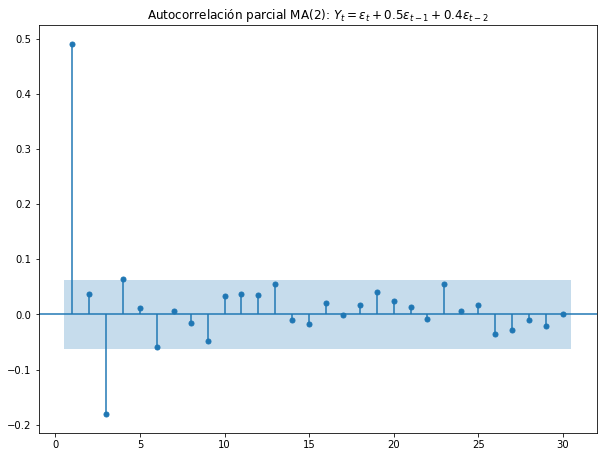

In [140]:
#graficamos función de autocorrelación parcial
plot_pacf(pMA2, zero=False, lags=30)
plt.title(r'Autocorrelación parcial MA(2): $Y_t = \varepsilon_t + 0.5 \varepsilon_{t-1} + 0.4 \varepsilon_{t-2}$')
plt.show()  

## 2.- Toma los siguientes dos dígitos de tu matrícula (Yy) y ordena de mayor a menor, simula un AR(2) donde  $ \phi_1=Y$ y $ \phi_2=y$

Vamos a simular un proceso autorregresivo de segundo orden AR(2) con $ \phi_1=0.3$ y $ \phi_2=0.0$

$Y_t = 0.3 Y_{t-1} + 0 Y_{t-2} + \varepsilon_t$ 

En este caso particular, pasamos a un proceso autorregresivo de primer orden AR(1) con $ \phi_1=0.3$

$Y_t = 0.3 Y_{t-1} + \varepsilon_t$ 

In [141]:
#en python tenemos que modelarlo como un proceso arma sin la parte MA(p)
np.random.seed(13)
ma2 = np.array([1])
ar2 = np.array([1, -0.3])
pAR1 = ArmaProcess(ar1, ma1).generate_sample(1000)

### Gráfica

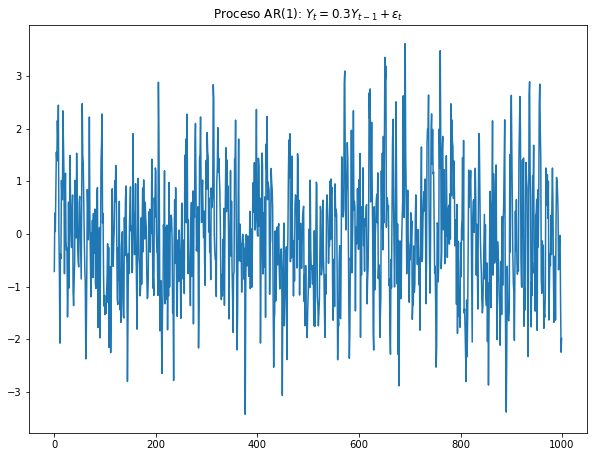

In [142]:
#graficamos
plt.plot(pAR1)
plt.title(r'Proceso AR(1): $Y_t = 0.3 Y_{t-1}+\varepsilon_t$')
plt.show()

### Prueba de raíz unitaria

In [143]:
#hacemos la prueba de dickey fuller aumentada ADF
adf2 = adfuller(pAR1)

#presentamos el p-value
print('p-value: %f' % adf2[1])



p-value: 0.000000


In [144]:
if adf2[1] < 0.05:
    
    print(f'con un un p-value={adf2[1]}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf2[1]}\n NO se rechaza hipótesis nula, serie no estacionaria') 


con un un p-value=1.5721039301279526e-25
 Se rechaza hipótesis nula, serie estacionaria


### Gráfica de autocorrelación

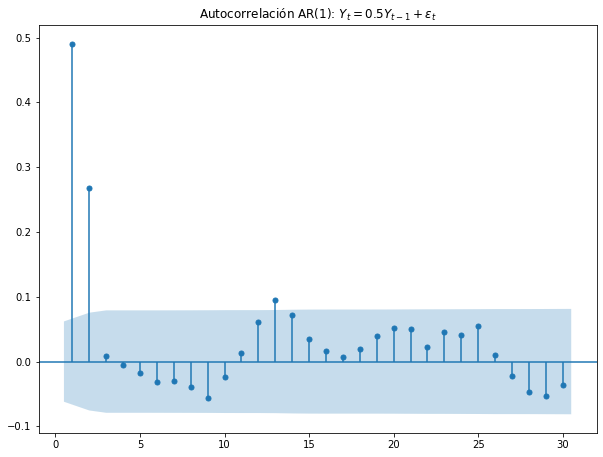

In [145]:
#graficamos función de autocorrelación
plot_acf(pAR1, zero=False, lags=30)
plt.title(r'Autocorrelación AR(1): $Y_t = 0.5 Y_{t-1}+\varepsilon_t$ ')
plt.show()

### Gráfica de autocorrelación parcial

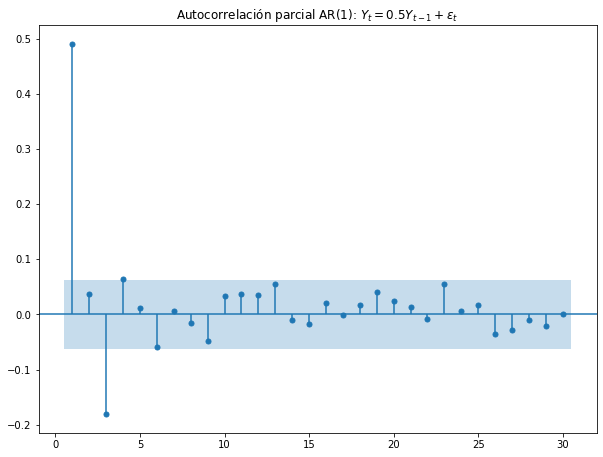

In [146]:
#graficamos función de autocorrelación parcial 
plot_pacf(pAR1, zero=False, lags=30)
plt.title(r'Autocorrelación parcial AR(1): $Y_t = 0.5 Y_{t-1}+\varepsilon_t$')
plt.show()  

## 3.- Toma los dos ejercicios anteriores para simular un modelo ARMA, combinándolos y utilizando los datos de tu matrícula

Vamos a simular un proceso autorregresivo ARMA(1, 2) con  $ \phi_1=0.3$,  $ \theta_1=0.5$ y $ \theta_2=0.4$ 

$Y_t = 0.3Y_{t-1} + \varepsilon_t$ + 0.5$\varepsilon_{t-1}$ + 0.4$ \varepsilon_{t-2}$

In [147]:
np.random.seed(13)
ar1 = np.array([1, -0.3])
ma1 = np.array([1, 0.5, 0.4])
pARMA12 = ArmaProcess(ar1, ma1).generate_sample(1000)

### Gráfica

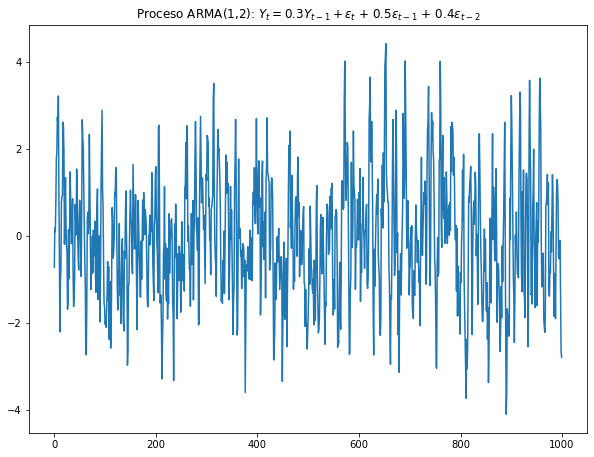

In [148]:
#graficamos
plt.plot(pARMA12)
plt.title(r'Proceso ARMA(1,2): $Y_t = 0.3Y_{t-1} + \varepsilon_t$ + 0.5$\varepsilon_{t-1}$ + 0.4$ \varepsilon_{t-2}$')
plt.show()

### Prueba de raíz unitaria

In [149]:
#hacemos la prueba de dickey fuller aumentada ADF
adf3 = adfuller(pARMA12)

#presentamos el p-value
print('p-value: %f' % adf3[1])


p-value: 0.000000


In [150]:
if adf3[1] < 0.05:
    
    print(f'con un un p-value={adf3[1]}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf3[1]}\n NO se rechaza hipótesis nula, serie no estacionaria') 

con un un p-value=4.543986068263062e-23
 Se rechaza hipótesis nula, serie estacionaria


### Gráfica de autocorrelación

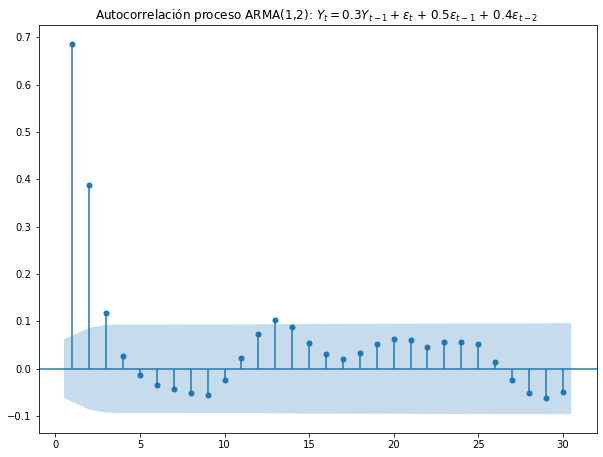

In [153]:
#graficamos función de autocorrelación
plot_acf(pARMA12, zero=False, lags=30)
plt.title(r'Autocorrelación proceso ARMA(1,2): $Y_t = 0.3Y_{t-1} + \varepsilon_t$ + 0.5$\varepsilon_{t-1}$ + 0.4$ \varepsilon_{t-2}$ ')
plt.show()

### Gráfica de autocorrelación

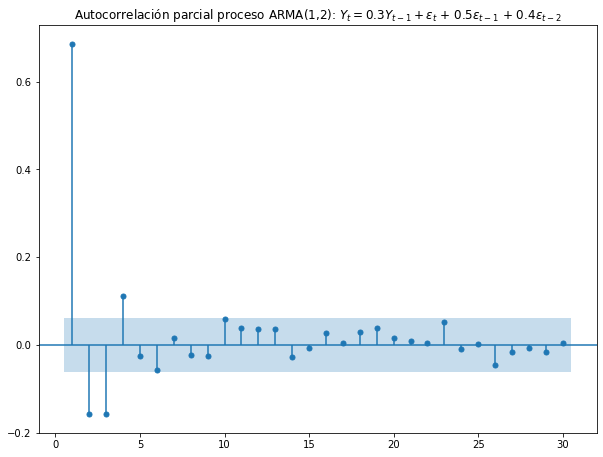

In [154]:
#graficamos función de autocorrelación parcial 
plot_pacf(pARMA12, zero=False, lags=30)
plt.title(r'Autocorrelación parcial proceso ARMA(1,2): $Y_t = 0.3Y_{t-1} + \varepsilon_t$ + 0.5$\varepsilon_{t-1}$ + 0.4$ \varepsilon_{t-2}$')
plt.show()  